In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#load boston house pricing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# print(housing.DESCR)
type(housing)
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [10]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [19]:
#print medinc feature
print(housing.data)#returns a numpy array of the data which is itself inside the data attribute of the bunch object


[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [20]:
print(housing.target)
print(housing.feature_names)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [23]:
ds= pd.DataFrame(housing.data, columns= housing.feature_names)#if column not there 0,1 indexing . also can set a list

In [24]:
ds.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [37]:
#creating a column for Price , get from target attribute
ds['Price'] = housing.target
ds.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [38]:
ds.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
 9   Price        20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [39]:
ds.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,5.000010


In [47]:
#check the missing values
#is null returns table
ds.isnull().sum()
#drop the duplicate medhouseval named column
ds.drop('MedHouseVal', axis=1, inplace=True)


In [48]:
#Exploratory data analysis
#correlation check and remove high correlated independent feature(+ve),
ds.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0, 0.5, 'Price')

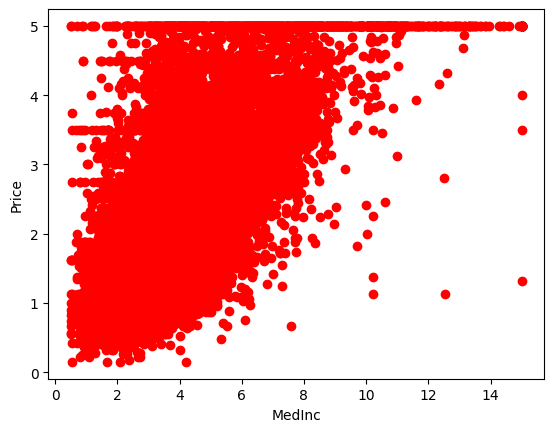

In [49]:
plt.scatter(ds.MedInc, ds.Price, c= 'red',)
plt.xlabel('MedInc')
plt.ylabel('Price')

<Axes: xlabel='MedInc', ylabel='Price'>

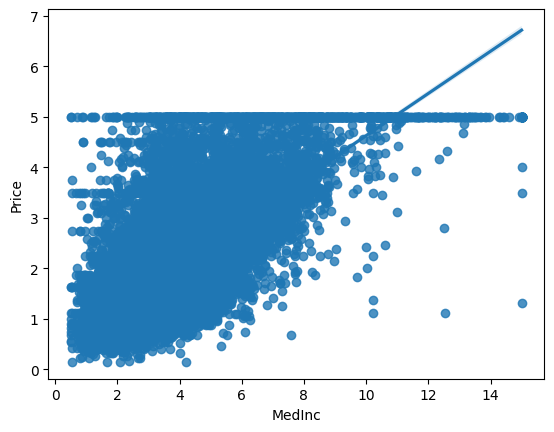

In [50]:
import seaborn as sns
sns.regplot(x= 'MedInc', y= 'Price', data= ds) #the scatterplots make a regressor line

<Axes: xlabel='Latitude', ylabel='Price'>

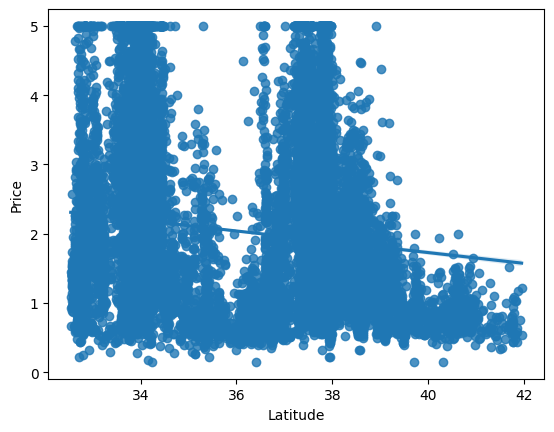

In [51]:
sns.regplot(x= 'Latitude', y= 'Price', data= ds) #the scatterplots make a regressor line

In [52]:
#now model creation for that independent and dependent features

x= ds.iloc[:,:-1]
y= ds.iloc[:,-1]

In [56]:
x.shape

(20640, 8)

In [57]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.3, random_state= 42, )

In [61]:
x_test.shape

(6192, 8)

In [62]:
#standard scaler to normalize data points to same scale so all feature converge in the same way in gradient descent to global minma
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [63]:
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [117]:
x_train[0]

array([ 0.13350629,  0.50935748,  0.18106017, -0.27384968, -0.18411678,
       -0.01082519, -0.80568191,  0.78093406])

###Model Training

In [69]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [70]:
lr.fit(x_train, y_train)

LinearRegression()

In [72]:
##print the coefficients and intercepts
print(lr.coef_)
print(lr.intercept_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]
2.0692396089424143


In [73]:
#on which params model is trained
print(lr.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [74]:
#prediction on test data
pred_lr= lr.predict(x_test)

In [120]:
print(pred_lr)
print(y_test)

[0.72604907 1.76743383 2.71092161 ... 2.07465531 1.57371395 1.82744133]
20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Name: Price, Length: 6192, dtype: float64


In [109]:
#check the accuracy of the model on test
lr.score(x_test, y_test)


0.5957702326061662

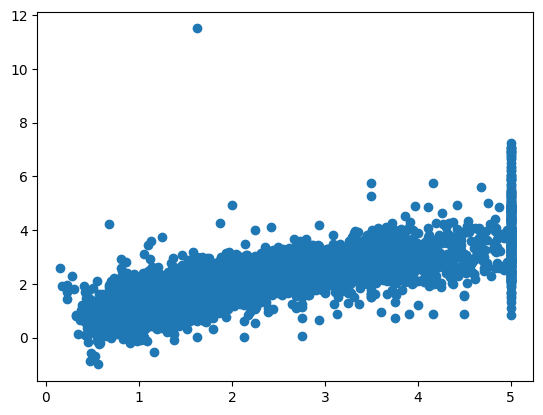

In [78]:
#plot a scatter plot for the prediction
plt.scatter(y_test, pred_lr)

In [80]:
#residuals or errors(array)
res= y_test-pred_lr
res

,Price
20046,-0.249049
3024,-1.309434
15663,2.289088
20484,-0.649147
9814,0.173042
...,...
17505,0.155059
13512,-0.237516
10842,0.109345
16559,-0.379714


<Axes: xlabel='Price', ylabel='Count'>

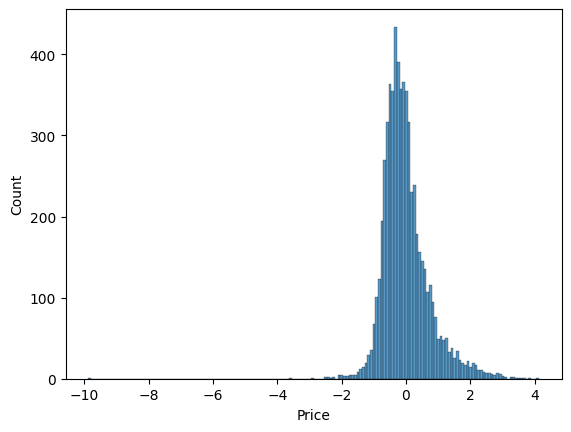

In [84]:
#plot this residuals
sns.histplot(res)# loss- a normal dist about zero- good model

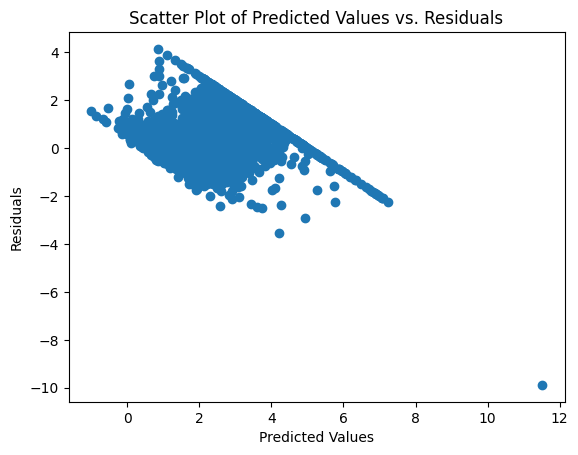

In [86]:
#scatter plot wrt to prediction and residuals
plt.scatter(pred_lr, res)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Predicted Values vs. Residuals')
plt.show()

In [87]:
#performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y_test, pred_lr))
print(mean_absolute_error(y_test, pred_lr))

0.5305677824766754
0.5272474538305953


In [88]:
from sklearn.metrics import r2_score
score= r2_score(y_test, pred_lr)
print(score)

0.5957702326061662


In [89]:
#adjusted r^2
1- (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5952472117200025

###New Data predictions

In [115]:
print(housing.data[0].shape)#8 features or data points
#because model is trained on two dimension so to predict on new data input should be 2 dim
print(housing.data[0].reshape(1,-1))
print(housing.target[0])

(8,)
[[   8.3252       41.            6.98412698    1.02380952  322.
     2.55555556   37.88       -122.23      ]]
4.526


In [113]:
#new data-> standardization
t=sc.transform(housing.data[0].reshape(1,-1))
print(t)
print(lr.predict(t))
lr.predict(sc.transform(housing.data[3].reshape(1,-1)))

[[ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]]
[80.26272496]


array([83.59907952])

In [96]:
lr.predict(housing.data[0].reshape(1,-1))

array([84.33102212])

###Pickling the model file for Deployment

In [121]:
import pickle
pickle.dump(lr, open('regmodel.pkl', 'wb'))#put this entire object on file

In [122]:
pickled_model= pickle.load(open('regmodel.pkl', 'rb'))

In [123]:
pickled_model.predict(sc.transform(housing.data[0].reshape(1,-1)))

array([84.33102212])